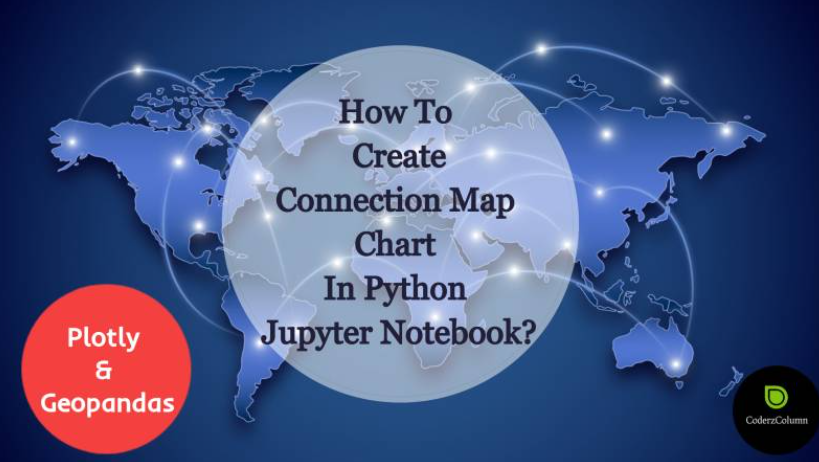

https://coderzcolumn.com/tutorials/data-science/how-to-create-connection-map-chart-in-python-jupyter-notebook-plotly-and-geopandas

In [3]:
!pip install git+git://github.com/geopandas/geopandas.git -q

In [4]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option("max.columns", 30)

print("Available Pandas Datasets", gpd.datasets.available)

Available Pandas Datasets ['naturalearth_lowres', 'naturalearth_cities', 'nybb']


Pobranie wykazu lotów

https://www.kaggle.com/ramirobentes/flights-in-brazil

In [5]:
!gdown --id "1UHwEp3wjprkHAKeUJDoTG9GWftIWyN5Q"

Downloading...
From: https://drive.google.com/uc?id=1UHwEp3wjprkHAKeUJDoTG9GWftIWyN5Q
To: /content/BrFlights2.csv.zip
41.6MB [00:00, 73.6MB/s]


In [7]:
!unzip "BrFlights2.csv.zip"

Archive:  BrFlights2.csv.zip
  inflating: BrFlights2.csv          


In [10]:
df = pd.read_csv("BrFlights2.csv", nrows=50000, encoding="latin1")
df = df[["Voos", "Companhia.Aerea","LongDest","LatDest","LongOrig","LatOrig", "Cidade.Origem", "Cidade.Destino", "Pais.Origem", "Pais.Destino"]]
print("Dataset Size : ",df.shape)
df.head()

Dataset Size :  (50000, 10)


,Voos,Companhia.Aerea,LongDest,LatDest,LongOrig,LatOrig,Cidade.Origem,Cidade.Destino,Pais.Origem,Pais.Destino
0,AAL - 203,AMERICAN AIRLINES INC,-51.175381,-29.993473,-49.172481,-25.532713,Sao Jose Dos Pinhais,Porto Alegre,Brasil,Brasil
1,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
2,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
3,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
4,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos


In [12]:
overseas_df = df[(df["Pais.Origem"] != df["Pais.Destino"]) & (df["Pais.Destino"] != "Brasil")]
overseas_cnt_df = overseas_df.groupby(["LongDest","LatDest","LongOrig","LatOrig"]).count()[["Voos"]].rename(columns={"Voos":"Num_Of_Flights"}).reset_index()
overseas_cnt_df = overseas_cnt_df.merge(df, how="left", left_on=["LongDest","LatDest","LongOrig","LatOrig"], right_on=["LongDest","LatDest","LongOrig","LatOrig"])

print("International Travel Dataset Size : ", overseas_cnt_df.shape)

## Please make a note that we are only taking first 1k to make run easy.
overseas_cnt_df = overseas_cnt_df.sample(frac=1.0).head(1000)

print("International Travel Dataset Size After Filtering : ", overseas_cnt_df.shape)

overseas_cnt_df.head()

International Travel Dataset Size :  (2317, 11)
International Travel Dataset Size After Filtering :  (1000, 11)


,LongDest,LatDest,LongOrig,LatOrig,Num_Of_Flights,Voos,Companhia.Aerea,Cidade.Origem,Cidade.Destino,Pais.Origem,Pais.Destino
74,-83.355384,42.216172,-46.478126,-23.434553,13,DAL - 52,DELTA AIRLINES,Guarulhos,Detroit,Brasil,Estados Unidos
416,-80.287046,25.795865,-46.478126,-23.434553,93,AAL - 930,AMERICAN AIRLINES INC,Guarulhos,Miami,Brasil,Estados Unidos
1645,-58.534828,-34.815004,-46.478126,-23.434553,67,AUT - 2277,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,Guarulhos,Buenos Aires,Brasil,Argentina
2063,8.562152,50.037933,-46.478126,-23.434553,31,DLH - 507,LUFTHANSA,Guarulhos,Frankfurt,Brasil,Alemanha
1611,-58.534828,-34.815004,-48.545966,-27.670118,31,ARG - 1273,AEROLINEAS ARGENTINAS,Florianopolis,Buenos Aires,Brasil,Argentina


In [13]:
brazil_df = df[df["Pais.Origem"] == df["Pais.Destino"]]
brazil_cnt_df = brazil_df.groupby(["LongDest","LatDest","LongOrig","LatOrig"]).count()[["Voos"]].rename(columns={"Voos":"Num_Of_Flights"}).reset_index()
brazil_cnt_df = brazil_cnt_df.merge(df, how="left", left_on=["LongDest","LatDest","LongOrig","LatOrig"], right_on=["LongDest","LatDest","LongOrig","LatOrig"])

print("Domestic Travel Dataset : ", brazil_cnt_df.shape)

## Please make a note that we are only taking first 2k to make run easy.
brazil_cnt_df = brazil_cnt_df.sample(frac=1.0).head(2000)

print("Domestic Travel Dataset After Filtering: ", brazil_cnt_df.shape)

brazil_cnt_df.head()

Domestic Travel Dataset :  (45370, 11)
Domestic Travel Dataset After Filtering:  (2000, 11)


,LongDest,LatDest,LongOrig,LatOrig,Num_Of_Flights,Voos,Companhia.Aerea,Cidade.Origem,Cidade.Destino,Pais.Origem,Pais.Destino
40154,-38.533097,-3.777156,-38.331241,-12.911098,57,GLO - 1096,GOL,Salvador,Fortaleza,Brasil,Brasil
2923,-54.786243,-2.424829,-60.046325,-3.035847,145,GLO - 1255,GOL,Manaus,Santarem,Brasil,Brasil
33250,-43.249423,-22.813410,-51.175381,-29.993473,177,GLO - 1673,GOL,Porto Alegre,Rio De Janeiro,Brasil,Brasil
23527,-46.656584,-23.627325,-47.917235,-15.869737,255,GLO - 1413,GOL,Brasilia,Sao Paulo,Brasil,Brasil
44413,-34.924015,-8.125932,-42.821170,-5.063543,52,AZU - 4257,AZUL,Teresina,Recife,Brasil,Brasil


# 2. Matplotlib 

We first need to load geopandas dataframe which has data about each country of the world with polygon representing each country's boundaries. We can simply plot this dataframe and it'll depict the world with each country highlighting their boundaries.

In [18]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


The below plot is exactly the same as the plot depicted in section 1.1 of this tutorial. The only difference between this graph and the previous graph is that lines were bit curved in projection to give the rounded look of earth.

Plotting a connection map with geopandas and matplotlib is a very easy task. We first need to plot world map by simply calling plot() on world geopandas dataframe which we had loaded earlier. We then need to loop through each flight entry plotting lines from source to destination of that flight.

If you do not have a background that we suggest that you go through our tutorial on geopandas to get a grasp on its usage.

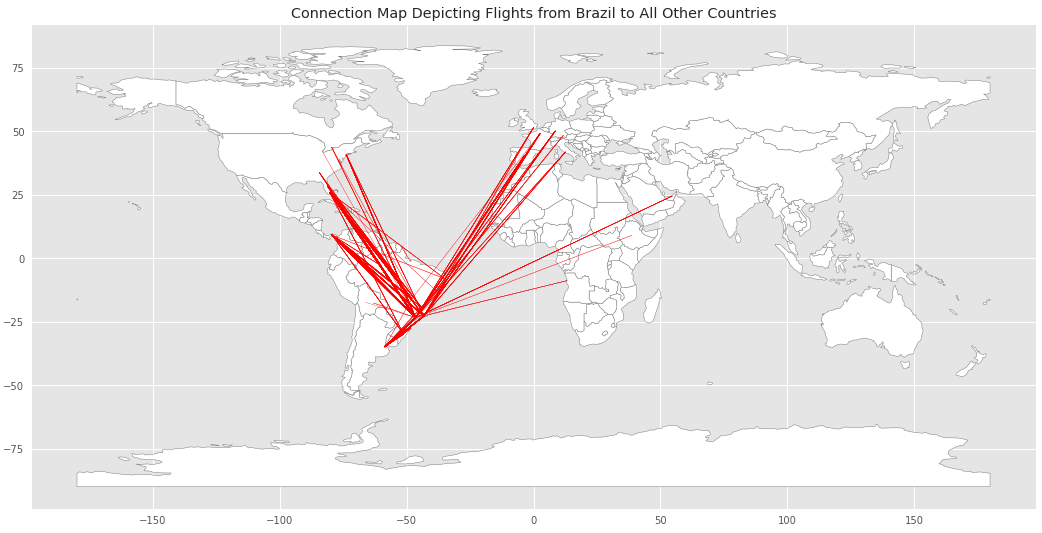

In [19]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world.plot(figsize=(18,10), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    for slat,dlat, slon, dlon, num_flights in zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"], overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"], overseas_cnt_df["Num_Of_Flights"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="red", alpha=0.5)

    plt.title("Connection Map Depicting Flights from Brazil to All Other Countries")

    plt.savefig("connection-map-geopandas-1.png", dpi=100)

## 2.2 Connection Map Depicting Flights from Brazil to All Other Countries With Airport Locations as Scatter Plot. 

Our second connection map using geopandas and matplotlib is exactly the same as that of a previous plot but we have also added points depicting source and destination cities by blue color. We have used the matplotlib scatter() method for this purpose specifying the size and color of each point in a map.

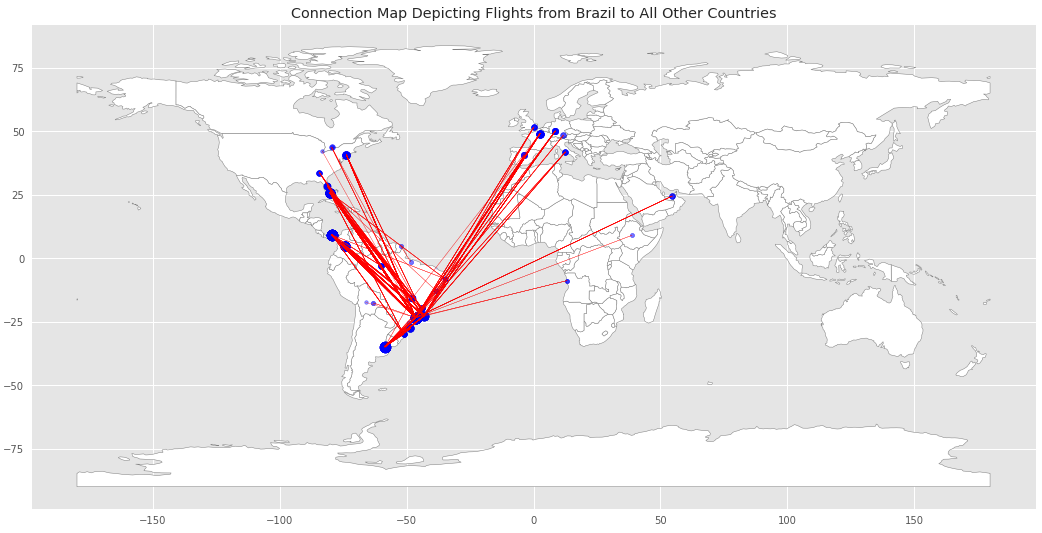

In [20]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world.plot(figsize=(18,10), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, num_flights, src_city, dest_city in zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"], overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"], overseas_cnt_df["Num_Of_Flights"], overseas_cnt_df["Cidade.Origem"], overseas_cnt_df["Cidade.Destino"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="red", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="blue", alpha=0.1, s=num_flights)

    plt.title("Connection Map Depicting Flights from Brazil to All Other Countries")

    plt.savefig("connection-map-geopandas-2.png", dpi=100)

## 2.3 Connection Map Depicting Flights from Brazil to All Other Countries With Airport Locations as Scatter Plot [Destination Cities Labeled]. 


Our third connection map plot is exactly the same as our previous connection plot with added functionalities. We have added labels of city names where Brazilian flights are landing. We have not added labels of source cities as it'll make the graph look very cluttered.

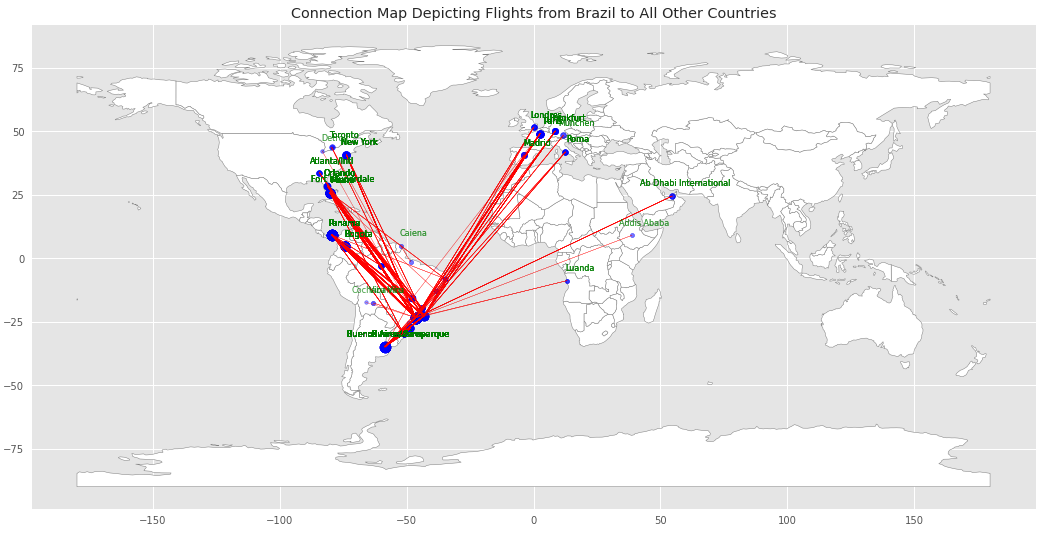

In [21]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world.plot(figsize=(18,10), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    ## Aprt from that we also have added logic for labels to destination cities.
    for slat,dlat, slon, dlon, num_flights, src_city, dest_city in zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"], overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"], overseas_cnt_df["Num_Of_Flights"], overseas_cnt_df["Cidade.Origem"], overseas_cnt_df["Cidade.Destino"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="red", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="blue", alpha=0.1, s=num_flights)

        #plt.text(slon+5, slat+5, src_city, fontsize=8, color="black", bbox=dict(facecolor='lightgrey', alpha=0.1), alpha=1.0, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+5, dlat+5, dest_city, fontsize=8, color="green", alpha=0.2, horizontalalignment='center', verticalalignment='center')

    plt.title("Connection Map Depicting Flights from Brazil to All Other Countries")

    plt.savefig("connection-map-geopandas-3.png", dpi=100)

## 2.4 Connection Map Depicting Flights between Cities of Brazil. 

The fourth connection map that we'll be plotting using geopandas and matplotlib depicts flight travels between various cities of Brazil. We also have used a scatter plot to display various cities.



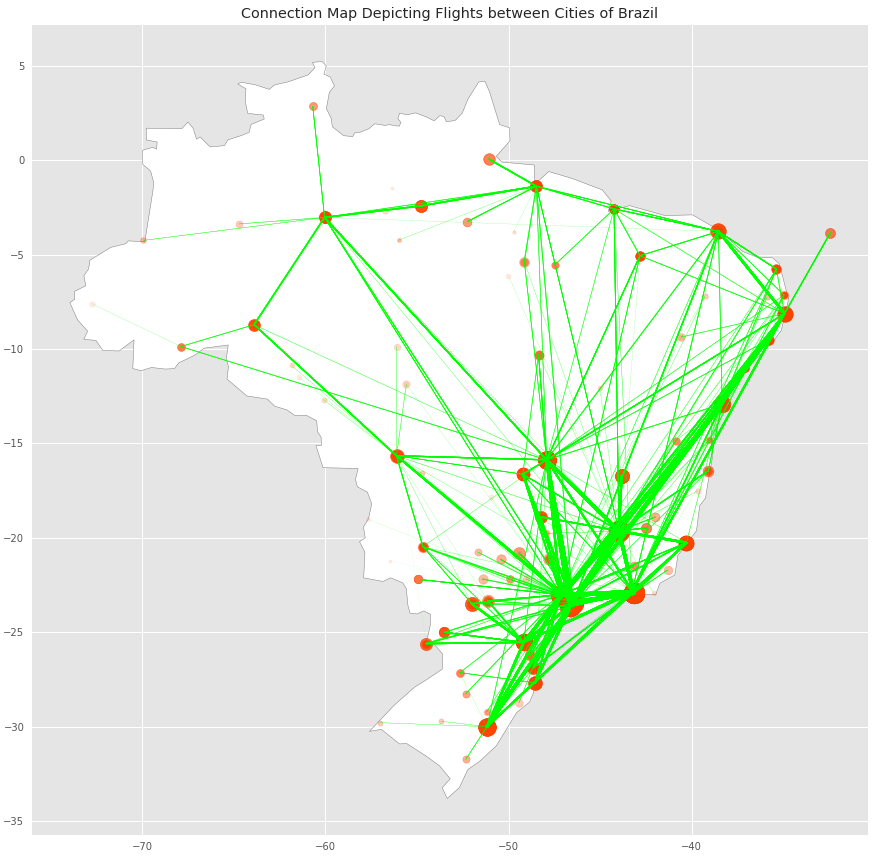

In [22]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Brazil"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, num_flights in zip(brazil_cnt_df["LatOrig"], brazil_cnt_df["LatDest"], brazil_cnt_df["LongOrig"], brazil_cnt_df["LongDest"], brazil_cnt_df["Num_Of_Flights"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="lime", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1, s=num_flights)

    plt.title("Connection Map Depicting Flights between Cities of Brazil")

    plt.savefig("connection-map-geopandas-4.png", dpi=100)

## 2.5 Connection Map Depicting Flights between Cities of Brazil. 
Our fifth connection map is exactly the same as the previous connection map but we also have added labels for each source and destination cities to map.



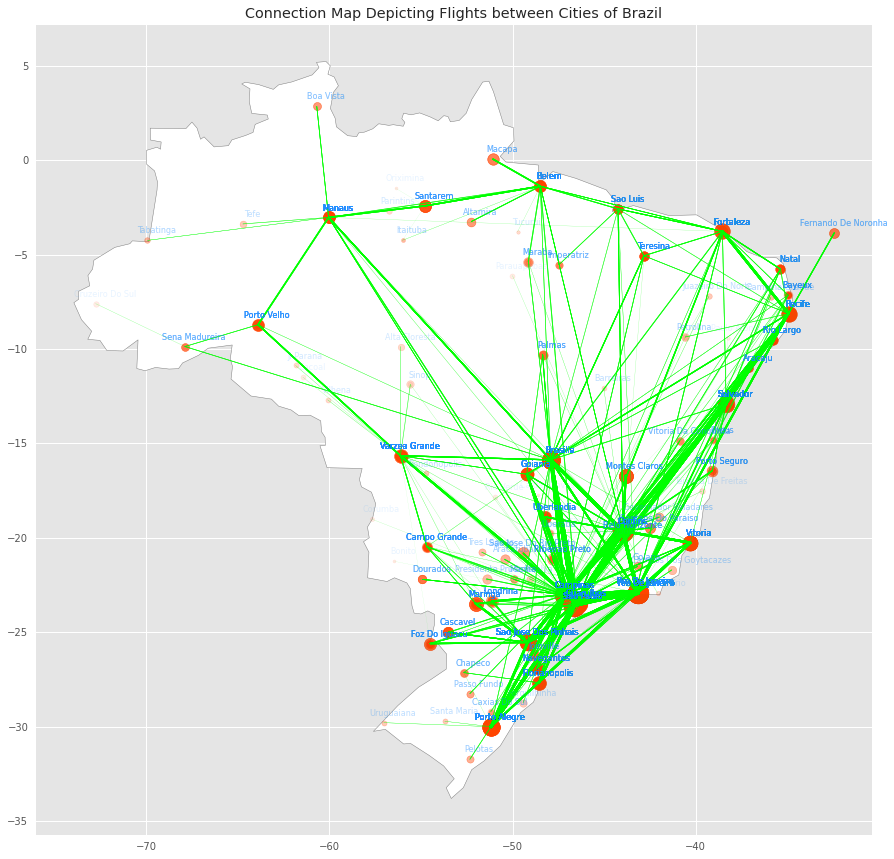

In [23]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Brazil"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations.
    ## Aprt from that we also have added logic for labels of source and destination cities.
    for slat,dlat, slon, dlon, num_flights, src_city, dest_city in zip(brazil_cnt_df["LatOrig"], brazil_cnt_df["LatDest"], brazil_cnt_df["LongOrig"], brazil_cnt_df["LongDest"], brazil_cnt_df["Num_Of_Flights"], brazil_cnt_df["Cidade.Origem"], brazil_cnt_df["Cidade.Destino"] ):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="lime", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1, s=num_flights)

        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')

    plt.title("Connection Map Depicting Flights between Cities of Brazil")

    plt.savefig("connection-map-geopandas-5.png", dpi=100)

# 1. Plotly 

## 1.1 Connection Map Depicting Flights from Brazil to All Other Countries.

The first connection map that we'll create will depict flights from brazil to all other countries in the world. We would like to know where Brazilians are traveling more often. We'll be using plotly Scattergeo() method available from plotly.graph_objects module. To create a connection map, we'll loop through all source and destination latitudes/longitudes to plot scatter plot on the world map with a marker as lines. We'll first merge all source and destination latitudes/longitudes into one list and then loop through it adding one line at a time to connection map.

In [14]:
fig = go.Figure()

source_to_dest = zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"],
                     overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"],
                     overseas_cnt_df["Num_Of_Flights"])

## Loop thorugh each flight entry
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/100, color="red")
                        ))

fig.update_layout(title_text = 'Connection Map Depicting Flights from Brazil to All Other Countries',
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False)

fig.show()

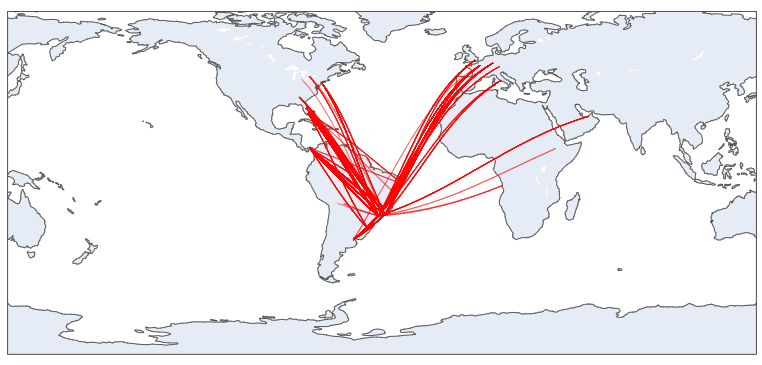

## 1.2 Connection Map Depicting Flights from Brazil to All Other Countries With Airport Locations as Scatter Plot

The second connection map that we'll be creating will be depicting flights from brazil to all other countries of the world like the previous connection map. Apart from lines, we have added points in graph highlighting source and destination locations for each flight which will display source and destination country & city in a tooltip when hovered over that point.



In [15]:
fig = go.Figure()

source_to_dest = zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"],
                     overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"],
                     overseas_cnt_df["Num_Of_Flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/100, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = overseas_cnt_df["Cidade.Origem"].values.tolist()+overseas_cnt_df["Cidade.Destino"].values.tolist()
countries = overseas_cnt_df["Pais.Origem"].values.tolist()+overseas_cnt_df["Pais.Destino"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = overseas_cnt_df["LongOrig"].values.tolist()+overseas_cnt_df["LongDest"].values.tolist(),
                lat = overseas_cnt_df["LatOrig"].values.tolist()+overseas_cnt_df["LatDest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'blue', opacity=0.1))
    )

## Update graph layout to improve graph styling.
fig.update_layout(title_text="Connection Map Depicting Flights from Brazil to All Other Countries",
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  geo= dict(showland = True, landcolor = 'white', countrycolor = 'grey', bgcolor="lightgrey"))

fig.show()

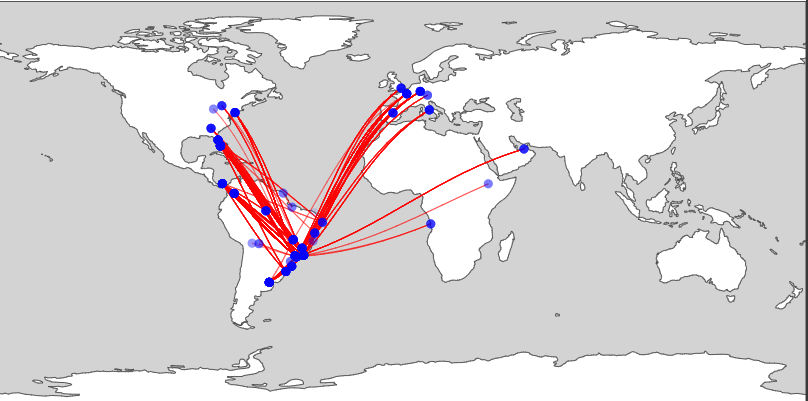

## 1.3 Connection Map Depicting Flights from Brazil to All Other Countries with Airport Locations as Scatter Plot [Orthographic Projection]. 

Our third connection map is exactly the same as the previous connection map with only a change in the projection of the graph. We have used the orthographic projection to allow the user to look at the graph from a different perspective.




In [16]:
fig = go.Figure()

source_to_dest = zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"],
                     overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"],
                     overseas_cnt_df["Num_Of_Flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/100, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = overseas_cnt_df["Cidade.Origem"].values.tolist()+overseas_cnt_df["Cidade.Destino"].values.tolist()
countries = overseas_cnt_df["Pais.Origem"].values.tolist()+overseas_cnt_df["Pais.Destino"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = overseas_cnt_df["LongOrig"].values.tolist()+overseas_cnt_df["LongDest"].values.tolist(),
                lat = overseas_cnt_df["LatOrig"].values.tolist()+overseas_cnt_df["LatDest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'blue', opacity=0.1,))
    )

## Update graph layout to improve graph styling.
fig.update_layout(title_text="Connection Map Depicting Flights from Brazil to All Other Countries (Orthographic Projection)",
                  height=500, width=500,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  geo= dict(projection_type = 'orthographic', showland = True, landcolor = 'lightgrey', countrycolor = 'grey'))

fig.show()

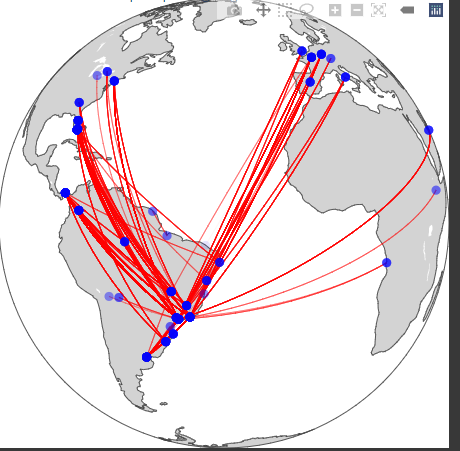

## 1.4 Connection Map Depicting Flights between Cities of Brazil. 

In [17]:
fig = go.Figure()

source_to_dest = zip(brazil_cnt_df["LatOrig"], brazil_cnt_df["LatDest"],
                     brazil_cnt_df["LongOrig"], brazil_cnt_df["LongDest"],
                     brazil_cnt_df["Num_Of_Flights"])


## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/100, color="lime")
                        ))

## Logic to create labels of source and destination cities of flights
cities = brazil_cnt_df["Cidade.Origem"].values.tolist()+brazil_cnt_df["Cidade.Destino"].values.tolist()
countries = brazil_cnt_df["Pais.Origem"].values.tolist()+brazil_cnt_df["Pais.Destino"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = brazil_cnt_df["LongOrig"].values.tolist()+brazil_cnt_df["LongDest"].values.tolist(),
                lat = brazil_cnt_df["LatOrig"].values.tolist()+brazil_cnt_df["LatDest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'orangered', opacity=0.1,))
    )

## Update graph layout to improve graph styling.
fig.update_layout(
                  height=500, width=800, margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  title_text = 'Connection Map Depicting Flights between Cities of Brazil',
                  geo = dict(projection_type = 'natural earth',scope = 'south america'),
                )

fig.show()

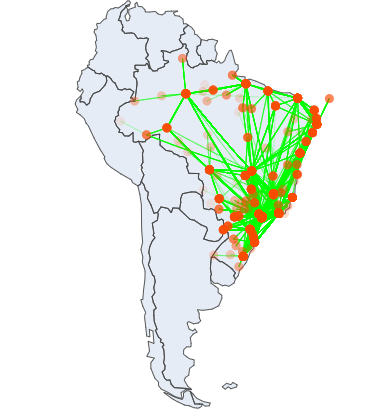